In [1]:
import json
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from scripts import tools

%matplotlib inline

dataset_root = '/mnt/data/COCO_dataset/'

annotation = json.load(open(dataset_root+'annotations/person_keypoints_train2017.json','r'))

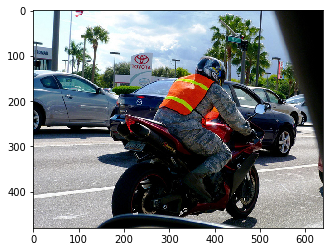

In [16]:
idx=0
test_img=skimage.io.imread(dataset_root+'train2017/'+'0'*6+str(annotation['annotations'][idx]['image_id'])+'.jpg')
test_coor=np.array(annotation['annotations'][idx]['keypoints']).reshape(-1,3)[:,:2]
plt.imshow(test_img)

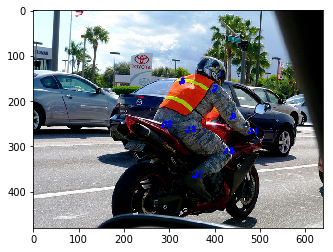

In [17]:
plt.imshow(tools.etc.markJoints(test_img.copy(),test_coor))

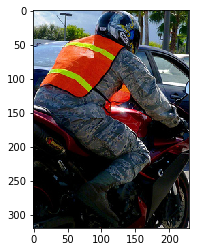

In [18]:
bbox = list(map(int,annotation['annotations'][idx]['bbox']))
plt.imshow(test_img[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2]])